# Regression Trees

Regression trees are a type of decision tree that is specifically designed for solving **regression problems**. Unlike classification trees, which predict discrete class labels, regression trees predict **continuous numerical values**. Regression trees are a powerful tool for modeling and predicting numerical outcomes, making them a valuable asset in various fields such as finance, economics, engineering, and any domain where the target variable is continuous.

Here's how regression trees work {cite:p}`breiman2017classification`:

1. **Structure:** A regression tree has a tree-like structure, with a **root node**, **internal nodes**, **branches**, and **leaf nodes**. Each internal node represents a splitting decision based on a feature, and each leaf node contains a predicted numerical value.

2. **Splitting Criteria:** The main goal of a regression tree is to minimize the **variance** of the target variable within each leaf node. The algorithm chooses the feature and the split point that result in the most significant reduction in variance after the split. This reduction in variance is often measured using **mean squared error (MSE)**, which calculates the average squared difference between the predicted values and the actual values within each leaf node.

3. **Recursive Splitting:** The construction of a regression tree involves a recursive process. The algorithm starts at the root node, selects the best feature and split point to minimize variance, and divides the data into subsets based on the chosen split. The process continues for each subset, creating child nodes and further splitting the data until a **stopping criterion** is met (e.g., a maximum tree depth or a minimum number of samples in a leaf node).

4. **Leaf Nodes and Predictions:** Once the tree construction process is complete, the leaf nodes contain the predicted numerical values. When you have a new data point, you traverse the tree from the root node to a specific leaf node based on the values of the input features. The predicted value in that leaf node becomes the model's prediction for the new data point.

5. **Pruning:** Like other decision trees, regression trees can be prone to **overfitting**, where the model captures noise in the training data rather than the underlying patterns. Pruning is a technique used to prevent overfitting by removing or merging unnecessary branches from the tree. This leads to a more generalized and less complex model that performs better on new, unseen data.

Regression trees are a valuable tool when you need to predict a continuous outcome based on a set of input features. However, it's essential to keep in mind that decision trees, including regression trees, can be sensitive to the specific training data and may not always generalize well to new data. Techniques like pruning and using **ensemble methods** (e.g., Random Forests) can help improve the predictive performance of regression trees.

<div class="alert alert-block alert-warning">

**Regression Tree Algorithm**

1. **Start**
2. Define the problem as a **regression task**, where the goal is to predict a continuous numerical value based on a set of input features.
3. Collect and preprocess the dataset, such as handling missing values, outliers, or scaling the features.
4. **Construct a Regression Tree:**
    - Define the **root node**, which contains the entire dataset.
    - Choose a feature to split the data based on **variance reduction**, which is the difference between the variance of the parent node and the weighted average variance of the child nodes.
    - Calculate **mean squared error (MSE)** for the split, which is the average squared difference between the predicted values and the actual values in each node.
    - Check if the **stopping criterion** is met (e.g., max depth or min samples). This criterion helps to prevent overfitting by limiting the growth of the tree.
        - If yes, create a **leaf node** with the predicted value, which is the mean of the actual values in that node.
        - If no, create **child nodes** and repeat the process for each subset.
5. **Pruning (Optional):**
    - Evaluate the tree for overfitting, which means that the tree captures noise in the training data rather than the underlying patterns.
    - Identify unnecessary branches for removal, which are the branches that do not improve the performance of the tree on a validation set.
    - Remove or merge branches to create a **simpler model**, which is more generalizable and less complex.
6. **End**

</div>

## Example: Auto MPG dataset

<font color='Blue'><b>Example</b></font>: Recall Auto MPG dataset from from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/9/auto+mpg).

In [1]:
import pandas as pd
# You can download the dataset from: http://archive.ics.uci.edu/static/public/9/auto+mpg.zip

# Define column names based on the dataset's description
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model_Year', 'Origin', 'Car_Name']

# Read the dataset with column names, treating '?' as missing values, and remove rows with missing values
auto_mpg_df = pd.read_csv('auto-mpg.data', names=column_names,
                          na_values='?',
                          delim_whitespace=True).dropna().reset_index(drop = True)

# Remove the 'Car_Name' column from the DataFrame
auto_mpg_df = auto_mpg_df.drop(columns=['Car_Name'])

# Display the resulting DataFrame
display(auto_mpg_df[['MPG', 'Horsepower', 'Cylinders']])

,MPG,Horsepower,Cylinders
0,18.0,130.0,8
1,15.0,165.0,8
2,18.0,150.0,8
3,16.0,150.0,8
4,17.0,140.0,8
...,...,...,...
387,27.0,86.0,4
388,44.0,52.0,4
389,32.0,84.0,4
390,28.0,79.0,4


### Modeling ln(MGP) as a function of Horsepower

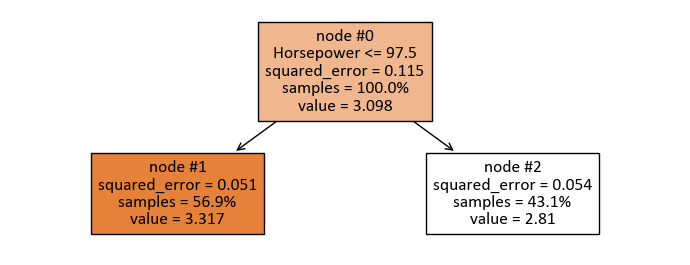

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

plt.style.use('../mystyle.mplstyle')

# Prepare the input features and target variable
X = auto_mpg_df[['Horsepower']]
y = np.log(auto_mpg_df.MPG.values)  # Take the natural logarithm of MPG

# Create a Decision Tree Regressor with specific settings
reg = DecisionTreeRegressor(criterion='squared_error',
                                 splitter='best', max_leaf_nodes= 2)

# Fit the Decision Tree Regressor to the data
_ = reg.fit(X, y)

# Create a figure and axis for plotting the decision tree
fig, ax = plt.subplots(1, 1, figsize=(7, 2.75))

# Names of the features
feature_names = X.columns.tolist()

# Visualize the decision tree
_ = tree.plot_tree(reg, ax=ax,
                   impurity=True,         # Show impurity in nodes
                   node_ids=True,         # Show node IDs
                   filled=True,           # Fill nodes with colors
                   feature_names=feature_names,  # Names of the features
                   proportion=True)       # Display class proportion

# Adjust the layout for better visualization
plt.tight_layout()

`````{admonition} Note
:class: warning

- **square_error**: Square error is a criterion used to measure the quality of a split in a decision tree regressor. It is equivalent to the mean squared error (MSE), which is the average squared difference between the predicted and actual target values in each node. It also represents the variance reduction achieved by the split, which is the goal of feature selection. Square error minimizes the L2 loss by using the mean target value as the prediction in each terminal node.

- **samples**: In a decision tree, "samples" refers to the number of training data points in a node. It indicates how many data points are involved in a split or a prediction at that node.

- **value**: The "value" is the predicted output for a new data point that falls into a node. It depends on the regression criterion used to build the tree. For example, if the criterion is square error, the "value" is the mean target value of the samples in that node. If the criterion is absolute error, the "value" is the median target value of the samples in that node.

`````

In [3]:
print(tree.export_text(reg, feature_names = X.columns))

|--- Horsepower <= 97.50
|   |--- value: [3.32]
|--- Horsepower >  97.50
|   |--- value: [2.81]



The split of the regression tree can be interpreted as follows:

0. The tree is divided based on the feature "Horsepower."

1. If the "Horsepower" is less than or equal to 97.50, the predicted value is 3.32.

1. If the "Horsepower" is greater than 97.50, the predicted value is 2.81.

This tree represents a binary decision structure where the regression model predicts different values depending on whether the "Horsepower" is above or below the threshold of 97.50.

To get `squared_error` and `value` for `node#1`, we have,

In [4]:
# Define the thresholds
_horsepower = 97.5

# Node #01: Predict and Evaluate Subset
print('Node #1: Predict and Evaluate Subset')
# Import metrics from scikit-learn
from sklearn import metrics

# Predict the target variable for data points where 'Cylinders' is less than 5.5
y_hat = reg.predict(X.loc[X['Horsepower'] < _horsepower])

# Get the indices of the data points where 'Cylinders' is less than 5.5
ind = X.loc[X['Horsepower'] < _horsepower].index.to_numpy()

# Calculate the mean squared error (MSE) for the predicted values
mse = metrics.mean_squared_error(y_hat, y[ind])

# Print the squared error (MSE) with three decimal places
print(f'squared_error = {mse:.3f}')

# Calculate the percentage of samples in this node compared to the entire dataset
sample_percentage = (len(y_hat) / len(y) * 100)

# Print the percentage of samples in this node
print(f'samples = {sample_percentage:.1f}%')

# Calculate and print the mean value of the predicted target variable in this node
mean_value_node1 = y_hat.mean()
print(f'value = {mean_value_node1:.3f}')

Node #1: Predict and Evaluate Subset
squared_error = 0.051
samples = 56.9%
value = 3.317


To get `squared_error` and `value` for `node#2`, we have,

In [5]:
# Node #02: Predict and Evaluate Subset
print('Node #2: Predict and Evaluate Subset')
# Import metrics from scikit-learn
from sklearn import metrics

# Predict the target variable for data points where 'Cylinders' is less than 5.5
y_hat = reg.predict(X.loc[X['Horsepower'] >= _horsepower])

# Get the indices of the data points where 'Cylinders' is less than 5.5
ind = X.loc[X['Horsepower'] >= _horsepower].index.to_numpy()

# Calculate the mean squared error (MSE) for the predicted values
mse = metrics.mean_squared_error(y_hat, y[ind])

# Print the squared error (MSE) with three decimal places
print(f'squared_error = {mse:.3f}')

# Calculate the percentage of samples in this node compared to the entire dataset
sample_percentage = (len(y_hat) / len(y) * 100)

# Print the percentage of samples in this node
print(f'samples = {sample_percentage:.1f}%')

# Calculate and print the mean value of the predicted target variable in this node
mean_value_node2 = y_hat.mean()
print(f'value = {mean_value_node2:.3f}')

Node #2: Predict and Evaluate Subset
squared_error = 0.054
samples = 43.1%
value = 2.810


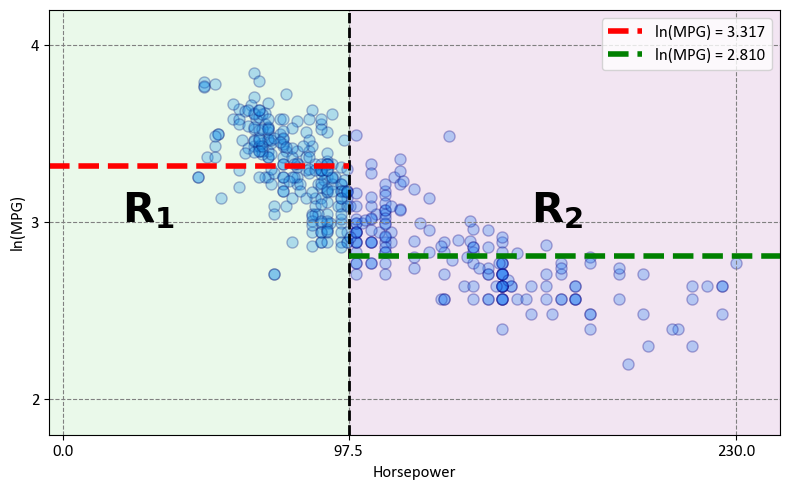

In [6]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Define tick positions and limits for the plot
xticks = [0, _horsepower, 230]
yticks = [2, 3, 4]
xlim = [-5, 245]
ylim = [1.8, 4.2]

# Create a scatter plot of data points
_ = ax.scatter(X['Horsepower'], y, marker='o',
               facecolor='DodgerBlue', edgecolor='Navy', alpha=0.3)

# Set labels, ticks, and limits for the axes
_ = ax.set(xlabel='Horsepower', ylabel='ln(MPG)',
           xticks=xticks, yticks=yticks, xlim=xlim, ylim=ylim)

# Add a vertical dashed line at x = 4.5
_ = ax.vlines(xticks[1], ylim[0], ylim[1],
              linestyles='dashed', linewidth=2, colors='Black')

# Add horizontal dashed lines for mean values
_ = ax.hlines(mean_value_node1, xlim[0], xticks[1],
              linestyles='dashed', linewidth=4, colors='Red',
              label = f'ln(MPG) = {mean_value_node1:.3f}')
_ = ax.hlines(mean_value_node2, xticks[1], xlim[-1],
              linestyles='dashed', linewidth=4, colors='Green',
              label = f'ln(MPG) = {mean_value_node2:.3f}')

# Annotations for the regions
_ = ax.annotate(r'$\mathbf{R_1}$', xy=(20, 3), fontsize=30)
_ = ax.annotate(r'$\mathbf{R_2}$', xy=(160, 3), fontsize=30)

# Fill regions with different colors
_ = ax.fill_between([xlim[0], xticks[1]], ylim[0], ylim[1],
                    color='LimeGreen', alpha=0.1)
_ = ax.fill_between([xticks[1], xlim[-1]], ylim[0], ylim[1],
                    color='purple', alpha=0.1)

# Add a grid to the plot
_ = ax.grid(True)
_ = ax.legend(fontsize = 12)
# Ensure a tight layout for the plot
plt.tight_layout()

The decision tree effectively divides the data into two distinct regions within the predictor space:

1. **Region 1 - $Hoursepower \leq 97.5$ ($R_1$):**
   - Mathematically expressed as: $R_1 = \{X~|~\text{Hoursepower} \leq 97.5\}$

2. **Region 2 - $Hoursepower > 97.5$ ($R_2$):**
   - Mathematically expressed as: $R_2 = \{X~|~\text{Hoursepower} > 97.5\}$

The following figure was generated utilizing  [dtreeviz](https://github.com/parrt/dtreeviz).

```{figure} dtr_fig01.png
---
width: 450px
align: center
---
A visual representation of the above Decision Tree Regressor.
```

<!-- 
import dtreeviz

viz_model = dtreeviz.model(reg, X, y, feature_names = feature_names, target_name= 'ln(MPG)')

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
-->

### Modeling ln(MGP) as a function of Horsepower and Cylinders

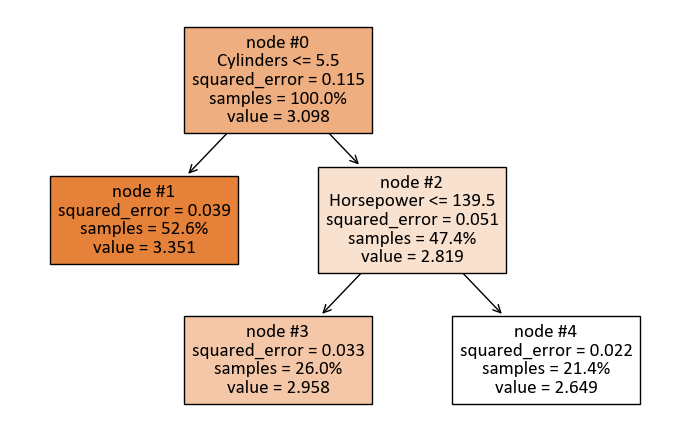

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Prepare the input features and target variable
X = auto_mpg_df[['Horsepower', 'Cylinders']]
y = np.log(auto_mpg_df.MPG.values)  # Take the natural logarithm of MPG

# Create a Decision Tree Regressor with specific settings
reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_leaf_nodes=3)

# Fit the Decision Tree Regressor to the data
_ = reg.fit(X, y)

# Create a figure and axis for plotting the decision tree
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))

# Names of the features
feature_names = X.columns.tolist()

# Visualize the decision tree
_ = tree.plot_tree(reg, ax=ax,
                   impurity=True,         # Show impurity in nodes
                   node_ids=True,         # Show node IDs
                   filled=True,           # Fill nodes with colors
                   feature_names=feature_names,  # Names of the features
                   proportion=True)       # Display class proportion

# Adjust the layout for better visualization
plt.tight_layout()

In [8]:
print(tree.export_text(reg, feature_names = X.columns))

|--- Cylinders <= 5.50
|   |--- value: [3.35]
|--- Cylinders >  5.50
|   |--- Horsepower <= 139.50
|   |   |--- value: [2.96]
|   |--- Horsepower >  139.50
|   |   |--- value: [2.65]



The tree is organized as follows:

0. The top-level split is based on the feature "Cylinders" with a threshold of 5.50. This means that the dataset is initially divided into two groups: one where the number of cylinders is less than or equal to 5.50 and the other where it is greater than 5.50.

1. For the first group (Cylinders <= 5.50), the model predicts a value of 3.35. This value represents the predicted outcome for instances in this subset.

1. For the second group (Cylinders > 5.50), further splitting is performed based on the feature "Horsepower" with a threshold of 139.50. This results in two additional subsets.

1. In the subset where Horsepower is less than or equal to 139.50, the model predicts a value of 2.96.

1. In the subset where Horsepower is greater than 139.50, the model predicts a value of 2.65.

This decision tree regressor is a structured representation of a predictive model used for regression tasks. It divides the data into different subsets based on specific feature values to make predictions about a target variable, typically a numeric value. In this case, the target variable is not explicitly mentioned, but it represents a numeric value that we are trying to predict.

For instance to get `squared_error` and `value` for `node#1`, we have,

In [9]:
# Define Thresholds
_cylinder = 5.5
_horsepower = 139.5

# Node #01: Predict and Evaluate Subset

# Import metrics from scikit-learn
from sklearn import metrics

# Predict the target variable for data points where 'Cylinders' is less than 5.5
y_hat = reg.predict(X.loc[X['Cylinders'] < _cylinder])

# Get the indices of the data points where 'Cylinders' is less than 5.5
ind = X.loc[X['Cylinders'] < _cylinder].index.to_numpy()

# Calculate the mean squared error (MSE) for the predicted values
mse = metrics.mean_squared_error(y_hat, y[ind])

# Print the squared error (MSE) with three decimal places
print(f'squared_error = {mse:.3f}')

# Calculate the percentage of samples in this node compared to the entire dataset
sample_percentage = (len(y_hat) / len(y) * 100)

# Print the percentage of samples in this node
print(f'samples = {sample_percentage:.1f}%')

# Calculate and print the mean value of the predicted target variable in this node
mean_value = y_hat.mean()
print(f'value = {mean_value:.3f}')

squared_error = 0.039
samples = 52.6%
value = 3.351


Observe that,

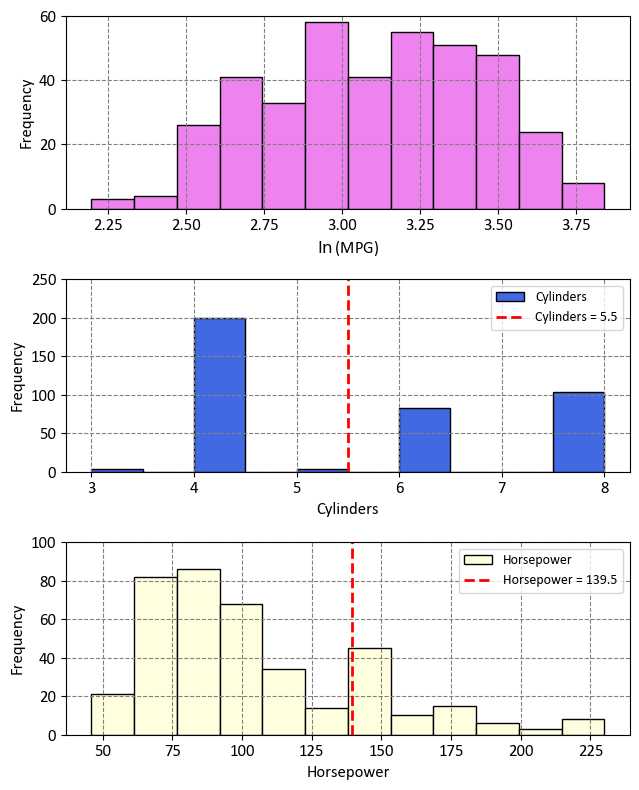

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(6.5, 8))
ax = ax.ravel()

# Top subplot: Histogram of the natural logarithm of MPG
ax[0].hist(np.log(auto_mpg_df.MPG), label='ln(MPG)',
           color ='Violet', ec = 'k', bins = 12)
ax[0].set(xlabel=r'$\ln$(MPG)', ylabel='Frequency', ylim=[0, 60])

# Middle subplot: Cylinders Histogram
ax[1].hist(auto_mpg_df.Cylinders, label='Cylinders',
           color='RoyalBlue', ec = 'k')
ax[1].set(xlabel='Cylinders', ylabel='Frequency', ylim=[0, 250])

# Add a vertical line at x = 5.5 in the middle subplot
ax[1].axvline(x=5.5, color='red', linestyle='--', lw=2,
              label= f'Cylinders = {_cylinder}')

# Bottom subplot: Horsepower Histogram
ax[2].hist(auto_mpg_df.Horsepower, label='Horsepower',
           color ='lightYellow', ec = 'k', bins = 12)
ax[2].set(xlabel='Horsepower', ylabel='Frequency', ylim=[0, 100])

# Add a vertical line at x = 139.5 in the bottom subplot
ax[2].axvline(x=139.5, color='red', linestyle='--', lw=2,
              label = f'Horsepower = {_horsepower}')

# Add legends to the middle and bottom subplots
for a in ax[1:]:
    a.legend()

plt.tight_layout()

The decision tree effectively divides the data into three distinct regions within the predictor space:

1. **Region 1 - Cylinders with 5 or Fewer Cylinders ($R_1$):**
   - This region, denoted as $R_1$, comprises vehicles with four or fewer cylinders.
   - Mathematically expressed as: $R_1 = \{X~|~\text{Cylinders} \leq 5.5\}$

2. **Region 2 - Horsepower with Fewer Than 139.5 Horsepower ($R_2$):**
   - The second region, labeled as $R_2$, includes vehicles with 6 or more cylinders and less than 139.5 horsepower.
   - Mathematically expressed as: $R_2 = \{X~|~\text{Cylinders} > 5.5,~\text{Horsepower} \leq 139.5\}$

3. **Region 3 - Horsepower with At Least 139.5 Horsepower ($R_3$):**
   - The third region, referred to as $R_3$, encompasses vehicles with five or more cylinders and at least 139.5 horsepower.
   - Mathematically expressed as: $R_3 = \{X~|~\text{Cylinders} > 5.5,~\text{Horsepower} > 139.5\}$

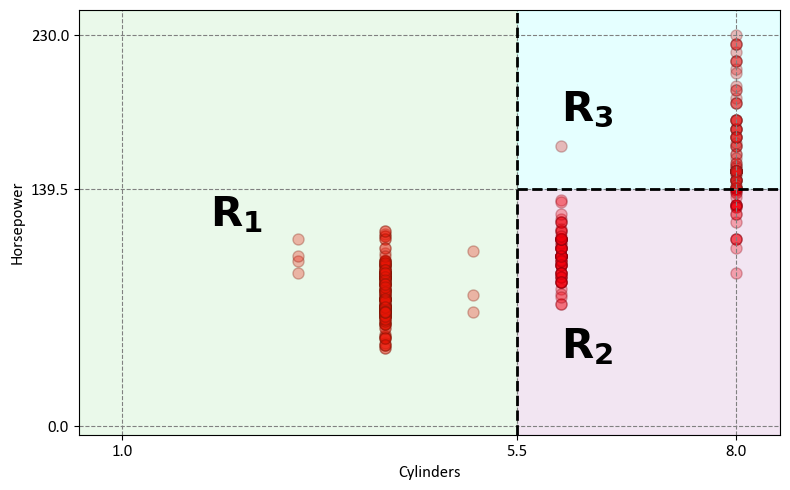

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Define tick positions and limits for the plot
xticks = [1, _cylinder, 8]
yticks = [0, _horsepower, 230]
xlim = [0.5, 8.5]
ylim = [-5, 245]

# Scatter plot of data points
_ = ax.scatter(auto_mpg_df['Cylinders'], auto_mpg_df['Horsepower'],
               marker='o', facecolor='Red', edgecolor='DarkRed', alpha=0.3)

# Set labels, ticks, and limits for the axes
_ = ax.set(xlabel='Cylinders', ylabel='Horsepower',
           xticks=xticks, yticks=yticks,
           xlim=xlim, ylim=ylim)

# Vertical dashed line at x = 4.5
_ = ax.vlines(xticks[1], ylim[0], ylim[1], linestyles='dashed', linewidth=2, colors='Black')

# Horizontal dashed line at y = 139.5
_ = ax.hlines(yticks[1], xticks[1], xlim[1], linestyles='dashed', linewidth=2, colors='Black')

# Annotations for the regions
_ = ax.annotate(r'$\mathbf{R_1}$', xy=(2, 117.5), fontsize=30)
_ = ax.annotate(r'$\mathbf{R_2}$', xy=(6, 40), fontsize=30)
_ = ax.annotate(r'$\mathbf{R_3}$', xy=(6, 180), fontsize=30)

# Fill regions with different colors
_ = ax.fill_between([xlim[0], xticks[1]], ylim[0], ylim[1], color='LimeGreen', alpha=0.1)
_ = ax.fill_between([xticks[1], xlim[1]], yticks[1], ylim[1], color='aqua', alpha=0.1)
_ = ax.fill_between([xticks[1], xlim[1]], ylim[0], yticks[1], color='purple', alpha=0.1)

# Add a grid to the plot
_ = ax.grid(True)

# Ensure a tight layout for the plot
plt.tight_layout()

So, to recap, in the context of decision trees:

- The terminal nodes or leaves ($R_1$, $R_2$, $R_3$) correspond to the distinct regions where the observations ultimately fall.
- Decision trees are typically drawn in a manner where these leaves appear at the bottom of the tree.
- The points along the tree where the predictor space splits into segments are referred to as internal nodes.
- The segments connecting these nodes are termed branches, akin to the branches of an actual tree.

The following figure was generated utilizing  [dtreeviz](https://github.com/parrt/dtreeviz).

```{figure} dtr_fig02.png
---
width: 600px
align: center
---
Visual representation of the above Decision Tree Regressor.
```

<!--
import dtreeviz

viz_model = dtreeviz.model(reg, X, y, feature_names = feature_names, target_name= 'ln(MPG)')

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
-->

## DecisionTreeRegressor algorithm in scikit-learn

The DecisionTreeRegressor algorithm in scikit-learn is a machine learning technique used for **regression tasks**, where the goal is to predict a continuous target variable based on input features. The algorithm constructs a **decision tree** to partition the feature space into regions and make predictions within each region. The partitioning is done by recursively splitting the data into subsets that optimize a certain **criterion**, which measures the quality of the splits. Three common criteria used for regression in DecisionTreeRegressor are **Mean Squared Error (MSE)**, **Half Poisson Deviance**, and **Mean Absolute Error (MAE)**.

Let's go through the mathematical explanations of these criteria {cite:p}`sklearnUserGuide`:

1. **Mean Squared Error (MSE)**:
    The Mean Squared Error is a commonly used criterion for regression tasks. It aims to minimize the average squared difference between the predicted values ($\hat{y}$) and the actual target values ($y$) within each node of the decision tree {cite:p}`sklearnUserGuide`.
    - $\bar{y}_m$: The mean target value of the samples in node $m$.
    - $n_m$: The number of samples in node $m$.
    - $Q_m$: The set of samples in node $m$.

    \begin{align*}
    \bar{y}_m &= \frac{1}{n_m} \sum_{y \in Q_m} y &&\text{(Mean target value)} \\
    H(Q_m) &= \frac{1}{n_m} \sum_{y \in Q_m} (\hat{y} - y)^2 && \text{(MSE)}
    \end{align*}

2. **Half Poisson Deviance**:
    The Half Poisson Deviance criterion is suitable for situations where the target variable represents counts or frequencies. It aims to minimize a measure of the difference between the observed ($y$) and predicted ($\hat{y}$) values, scaled by a logarithmic term {cite:p}`sklearnUserGuide`.

    \begin{align*}
    H(Q_m) &= \frac{1}{n_m} \sum_{y \in Q_m} \left( y \log\frac{y}{\hat{y}_m} - y + \hat{y}_m \right) \quad \text{(Half Poisson Deviance)}
    \end{align*}

3. **Mean Absolute Error (MAE)**:
    The Mean Absolute Error criterion aims to minimize the average absolute difference between the predicted values ($\hat{y}$) and the actual target values ($y$) within each node {cite:p}`sklearnUserGuide`.

    - $median(y)_m$: The median target value of the samples in node $m$.

    \begin{align*}
    median(y)_m &= \underset{y \in Q_m}{\mathrm{median}}(y) && \text{(Median target value)} \\
    H(Q_m) &= \frac{1}{n_m} \sum_{y \in Q_m} |\hat{y} - y| && \text{(MAE)}
    \end{align*}

The DecisionTreeRegressor algorithm selects the split that minimizes the chosen criterion at each node during the tree-building process. This recursive partitioning continues until a **stopping criterion** is met, such as reaching a predefined maximum depth or the number of samples in a node falling below a certain threshold.

It's worth noting that while these criteria provide guidelines for constructing the decision tree, the actual implementation may involve additional optimizations and techniques to handle overfitting and improve predictive performance. For more details, you can refer to the {cite:p}`sklearnUserGuide`.

```{admonition} DecisionTreeRegressor Algorithm

1. **Initialization**: Start with the entire dataset, $D$, which consists of input feature vectors $x_i \in \mathbb{R}^n$ and corresponding target values $y_i \in \mathbb{R}$ for $i = 1, 2, \ldots, l$, where $l$ is the number of samples.

2. **Node Splitting (Recursive Process)**:

   a. Check if a **stopping criterion** is met (e.g., maximum depth, minimum samples per leaf). This criterion helps to prevent overfitting by limiting the growth of the tree.

      * If yes, create a **terminal node** with a prediction value. For example, if using MSE, set the prediction value as the mean of the target values in the node.

      * If no, proceed to the next step.

   b. For each feature $j$ and each possible split value $s$:

      * i. Split the dataset into two subsets, $D_{\text{left}}$ and $D_{\text{right}}$, based on the condition $x_{ij} \leq s$, where $x_{ij}$ is the $j$-th feature of the $i$-th sample.

      * ii. Calculate the **quality of the split** using one of the criteria:

          - **Mean Squared Error (MSE)**:
            \begin{equation}H(D) = \frac{1}{l} \sum_{i=1}^{l} (\hat{y}_i - y_i)^2\end{equation}

          - **Half Poisson Deviance**:
            \begin{equation}H(D) = \frac{1}{l} \sum_{i=1}^{l} \left( y_i \log\frac{y_i}{\hat{y}_i} - y_i + \hat{y}_i \right)\end{equation}

          - **Mean Absolute Error (MAE)**:
            \begin{equation}H(D) = \frac{1}{l} \sum_{i=1}^{l} |\hat{y}_i - y_i|\end{equation}

      * iii. Choose the split that **minimizes $H(D)$**, i.e., the split that results in the lowest criterion value.

   c. Create a **decision node** with the chosen split feature $j$ and split value $s$.

   d. Recursively apply the algorithm to the subsets $D_{\text{left}}$ and $D_{\text{right}}$ to grow the tree.

3. **Prediction**: To make a prediction for a new input vector $x$, traverse the decision tree from the root node to a leaf node based on the feature values of $x$. The prediction value for $x$ is the value associated with the leaf node.

```

<font color='Blue'><b>Example:</b></font>
In this example, a decision tree is employed to model and fit a cosine curve amidst noisy observations. The decision tree captures local linear relationships, effectively approximating the underlying cosine curve while considering the noisy nature of the data. This scenario showcases how decision trees can adapt to data patterns and perform regression tasks. The presented example is an adapted version of an example available in scikit-learn's documentation
{cite:p}`sklearnUserGuide`.

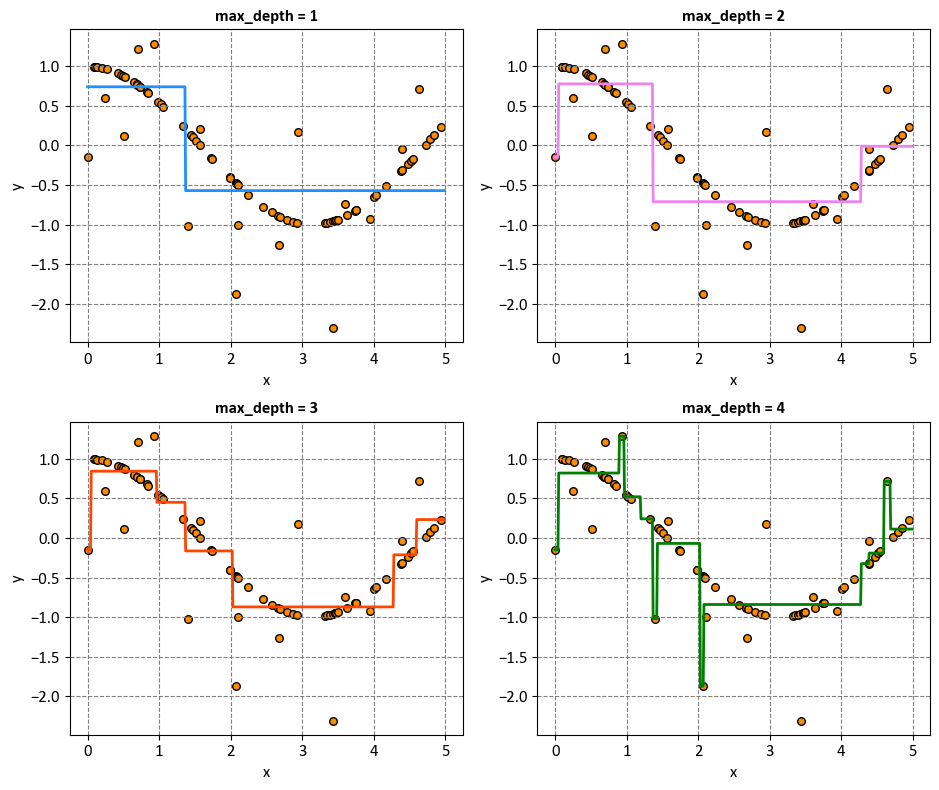

In [16]:
# This is an modified version of an example by Sklearn:
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.cos(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Create decision tree regressors with different max depths
max_depths = [1, 2, 3, 4]
colors = ["DodgerBlue", "Violet", "OrangeRed", "Green"]

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(9.5, 8))
axes = axes.ravel()

for i, (depth, color) in enumerate(zip(max_depths, colors)):
    ax = axes[i]
    ax.scatter(X, y, s= 30, edgecolor="black", c="darkorange", label="data")
    
    regr = DecisionTreeRegressor(max_depth=depth).fit(X, y)
    y_pred = regr.predict(X_test)
    ax.plot(X_test, y_pred, color=color, linewidth=2)
    
    _ = ax.set_title(f"max_depth = {depth}", weight = 'bold')
    _ = ax.set(xlabel = "x", ylabel = "y")

plt.tight_layout()

In this context, the `max_depths` list specifies different values for the `max_depth` parameter of the DecisionTreeRegressor. Each value determines the maximum depth to which the decision tree can grow during its construction.

1. **max_depth = 1**:
   With a maximum depth of 1, the decision tree will only have a single split. This means that the tree will create one node that best splits the data into two regions based on some feature threshold. The decision boundary will be a horizontal or vertical line, which will not capture the complexity of the underlying cosine curve. This model will likely underfit the data.

2. **max_depth = 2**:
   Increasing the maximum depth to 2 allows the decision tree to make one additional split. The tree will now have a root node and two child nodes. This might allow the decision tree to capture some basic curvature of the cosine curve, but it's still limited in terms of complexity.

3. **max_depth = 3**:
   With a maximum depth of 3, the decision tree can create three levels of nodes. This extra depth allows the tree to capture more of the curvature in the cosine curve, but it might still miss some finer details. The model might start to capture the initial rise and the subsequent fall of the cosine curve.

4. **max_depth = 4**:
   Increasing the maximum depth to 4 adds another level of complexity to the decision tree. The tree can now create four levels of nodes. This could allow the tree to better approximate the shape of the cosine curve, capturing more of its oscillations and details.

<!-- gridspec_kw={'height_ratios': [1, 2, 3]} -->

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

def _DTR_TreePlot(max_depth=1, figsize=(6.5, 3.5)):
    """
    Generates a decision tree plot based on the specified parameters.

    Parameters:
    - max_depth (int): Maximum depth of the decision tree.
    - figsize (tuple): Figure size (width, height).

    Returns:
    None
    """
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    regr = DecisionTreeRegressor(max_depth=max_depth).fit(X, y)
    _ = tree.plot_tree(regr, ax=ax,
                       filled=True,
                       impurity=True,
                       node_ids=True,    
                       feature_names = ['x'],
                       proportion=True,
                       fontsize=12)
    _ = ax.set_title(f"Decision Tree with max_depth = {max_depth}", weight='bold')

    plt.tight_layout()
    
    print(tree.export_text(regr, feature_names = ['x']))

**max_depth = 1**:

|--- x <= 1.36
|   |--- value: [0.74]
|--- x >  1.36
|   |--- value: [-0.57]



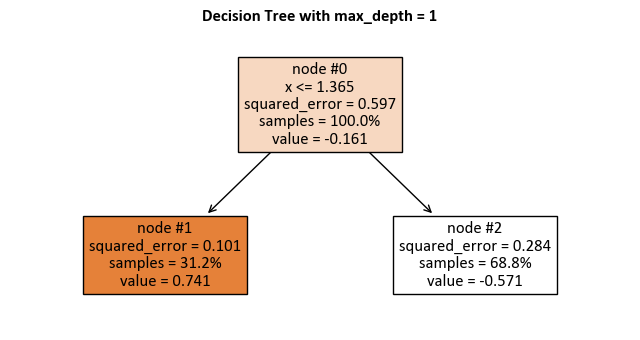

In [14]:
_DTR_TreePlot()

In [17]:
import dtreeviz

regr = DecisionTreeRegressor(max_depth=1).fit(X, y)

viz_model = dtreeviz.model(regr, X, y, feature_names = 'x', target_name= 'y')

v = viz_model.view()     # render as SVG into internal object 
v.show()

The following figure was generated utilizing  [dtreeviz](https://github.com/parrt/dtreeviz).

```{figure} dtr_fig03.png
---
width: 450px
align: center
---
A visual representation of the above Decision Tree Regressor.
```

<!--
import dtreeviz

regr = DecisionTreeRegressor(max_depth=1).fit(X, y)

viz_model = dtreeviz.model(regr, X, y, feature_names = 'x', target_name= 'y')

v = viz_model.view()     # render as SVG into internal object 
v.show()
-->

Here is how to read the tree:

- **node #0** shows the root node, which is the starting point of the tree. It splits the data based on the value of x. If x is less than or equal to 1.36, then the data goes to the left branch. If x is greater than 1.36, then the data goes to the right branch.
- **node #1** shows the left terminal node, which is the end point of the tree. It has a predicted value of 0.74, which means that the average value of the target variable for the data that reaches this node is 0.74.
- **node #2** shows the right terminal node, which has a predicted value of -0.57, which means that the average value of the target variable for the data that reaches this node is -0.57.

**max_depth = 2**:

|--- x <= 1.36
|   |--- x <= 0.05
|   |   |--- value: [-0.15]
|   |--- x >  0.05
|   |   |--- value: [0.78]
|--- x >  1.36
|   |--- x <= 4.28
|   |   |--- value: [-0.71]
|   |--- x >  4.28
|   |   |--- value: [-0.01]



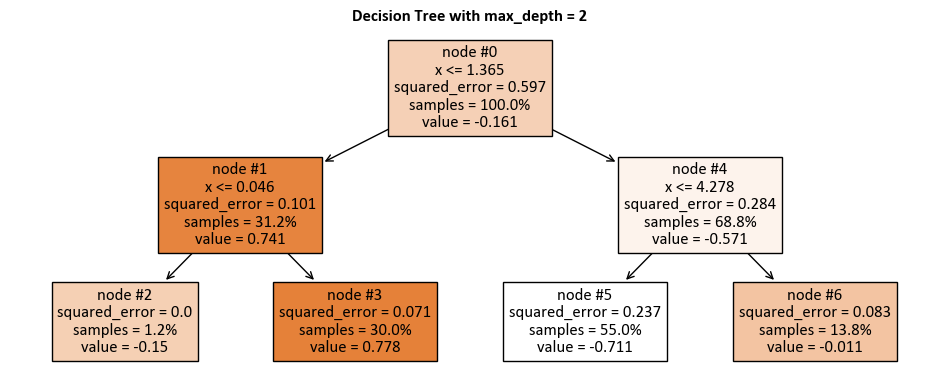

In [18]:
_DTR_TreePlot(max_depth = 2, figsize = (9.5, 4))

The following figure was generated utilizing  [dtreeviz](https://github.com/parrt/dtreeviz).

```{figure} dtr_fig04.png
---
align: center
---
A visual representation of the above Decision Tree Regressor.
```

<!--
import dtreeviz

regr = DecisionTreeRegressor(max_depth=2).fit(X, y)

viz_model = dtreeviz.model(regr, X, y, feature_names = 'x', target_name= 'y')

v = viz_model.view()     # render as SVG into internal object 
v.show()
-->

Here is how to read the tree:

- **node #0** shows the root node, which is the starting point of the tree. It splits the data based on the value of x. If x is less than or equal to 1.36, then the data goes to the left branch. If x is greater than 1.36, then the data goes to the right branch.
- **node #1** shows the left internal node, which is a node that splits the data further based on the value of x. If x is less than or equal to 0.05, then the data goes to the left branch. If x is greater than 0.05, then the data goes to the right branch.
- **node #2** shows the left terminal node, which has a predicted value of -0.15, which means that the average value of the target variable for the data that reaches this node is -0.15.
- **node #3** shows the right terminal node, which has a predicted value of 0.78, which means that the average value of the target variable for the data that reaches this node is 0.78.
- **node #4** shows the right internal node, which is a node that splits the data further based on the value of x. If x is less than or equal to 4.28, then the data goes to the left branch. If x is greater than 4.28, then the data goes to the right branch.
- **node #5** shows the left terminal node, which has a predicted value of -0.71, which means that the average value of the target variable for the data that reaches this node is -0.71.
- **node #6** shows the right terminal node, which has a predicted value of -0.01, which means that the average value of the target variable for the data that reaches this node is -0.01.